<H1> Assignment 11 </H1> 
<H3> Author: Shreya Kapoor </H3> 

![title](picture.png)
Image from Slides Prof. Frohlich

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
import numpy as np
import glob
import os 
import tensorflow as tf
tf.keras.backend.clear_session()

In [4]:
def preprocess(file):  
    data = [ x.split(',') for x in file.split('\n')[:-1]] # first split by the escape and then comma
    data = pd.DataFrame(data)
    data = data.replace('?', np.nan)
    data.dropna(inplace = True)
    return data

def load():
    columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']
    df = pd.DataFrame()
    path = "../UCI_data"
    for file in glob.glob(os.path.join(path, 'processed.*.data')):
        if 'processed' in file: 
            print (file)
            f = open(file).read()
            data = preprocess(f)
            df = df.append(data)
    df.columns = columns
    for i in range(len(df.columns)): 
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
    return df
    

In [5]:
df = load()

../UCI_data/processed.cleveland.data
../UCI_data/processed.switzerland.data
../UCI_data/processed.hungarian.data
../UCI_data/processed.va.data


In [6]:
df.head()
df.index = range(len(df))

In [7]:
len(df)

299

In [8]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [9]:
df['goal']= df['num'] >=1
df.goal = df.goal.astype(int)
df = df.drop(columns = ['num'])

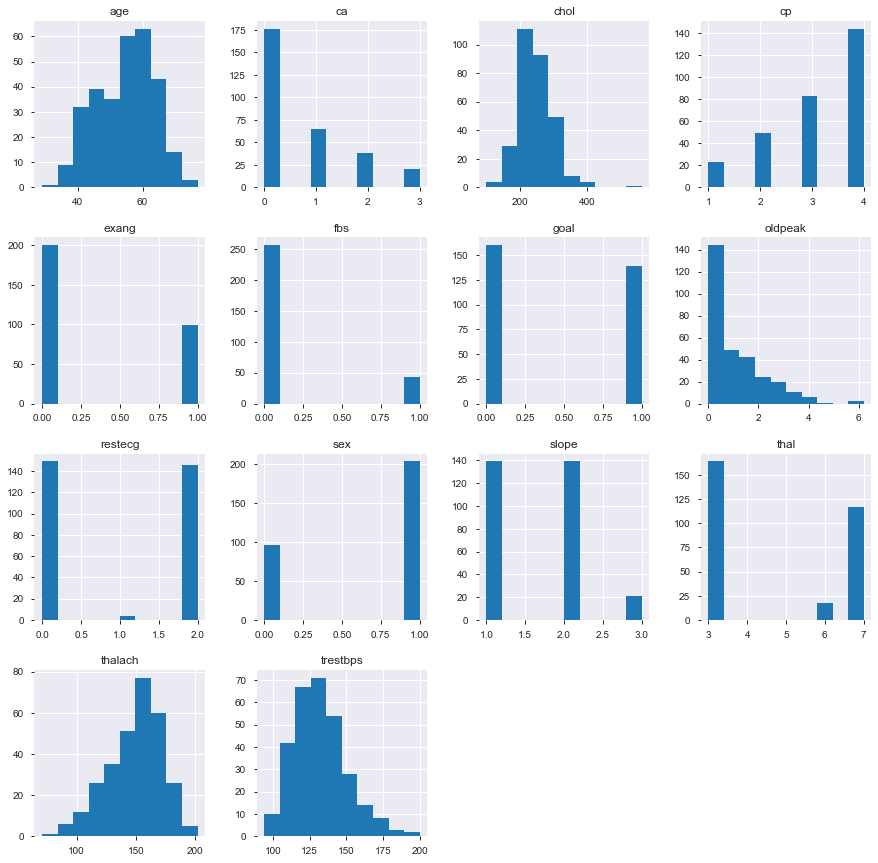

In [10]:
 c = df.hist(figsize = (15,15))

In our dataset we have the following categorical features for which we can use one hot encoding.
    - Sex (categorical) 0 female and 1 male
    - cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic 
    - 41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping 
     
The ordinal features are which can be left as they are since they can be scaled and used afterwards
    - Fasting blood pressure
         fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    - exang: exercise induced angina (1 = yes; 0 = no) 
    -restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

In [11]:
from tensorflow.keras.utils import to_categorical

df['sex'] = to_categorical(np.array(df['sex']))


In [12]:
df['cp'] = to_categorical(np.array(df['cp']))
df['slope'] = to_categorical(np.array(df['slope']))

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,0.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0.0,6.0,0
1,67.0,0.0,0.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,0.0,3.0,3.0,1
2,67.0,0.0,0.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,0.0,2.0,7.0,1
3,37.0,0.0,0.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0.0,3.0,0
4,41.0,1.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,3.0,0


Try: One hot encoding for the categorical values 

To train: Bottleneck autoencoder

![title](Autoencoders.png)
Image from Jeremy Jordan https://www.jeremyjordan.me/autoencoders/

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')

In [15]:
df.reindex(range(len(df)))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,0.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,0.0,6.0,0
1,67.0,0.0,0.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,0.0,3.0,3.0,1
2,67.0,0.0,0.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,0.0,2.0,7.0,1
3,37.0,0.0,0.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,0.0,3.0,0
4,41.0,1.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,68.0,0.0,0.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,0.0,2.0,7.0,1
295,57.0,0.0,0.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,0.0,1.0,7.0,1
296,57.0,1.0,0.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,0.0,1.0,3.0,1
297,47.0,0.0,0.0,150.0,226.0,0.0,0.0,98.0,1.0,1.5,0.0,0.0,7.0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns= ['goal']), df['goal'], test_size = 0.2)

In [18]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

In [19]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Model


    shape: A shape tuple (integers), not including the batch size.
        For instance, `shape=(32,)` indicates that the expected input
        will be batches of 32-dimensional vectors. Elements of this tuple
        can be None; 'None' elements represent dimensions where the shape is
        not known.

In [20]:
input_values = Input(shape=(13,))
encoded = Dense(13//2, activation='tanh')(input_values)
decoded = Dense(13, activation='tanh')(encoded)
autoencoder = Model(input_values, decoded)

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
encoder = Model(input_values, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(13//2,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [24]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
#X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
#X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print (X_train.shape)
print (X_test.shape)


(239, 13)
(60, 13)


In [27]:
autoencoder.fit(np.array(X_train), np.array(X_train),
                epochs=100,
                batch_size=25,
                shuffle=True,
                validation_data = (np.array(X_test), np.array(X_test)))

Train on 239 samples, validate on 60 samples
Epoch 1/100
239/239 [==============================] - 1s 4ms/sample - loss: 2.1017 - val_loss: 2.1220
Epoch 2/100
239/239 [==============================] - 0s 195us/sample - loss: 2.0743 - val_loss: 2.0676
Epoch 3/100
239/239 [==============================] - 0s 271us/sample - loss: 2.0117 - val_loss: 1.9776
Epoch 4/100
239/239 [==============================] - 0s 226us/sample - loss: 1.8649 - val_loss: 1.6896
Epoch 5/100
239/239 [==============================] - 0s 182us/sample - loss: 1.5695 - val_loss: 1.4898
Epoch 6/100
239/239 [==============================] - 0s 256us/sample - loss: 1.4434 - val_loss: 1.4441
Epoch 7/100
239/239 [==============================] - 0s 240us/sample - loss: 1.4142 - val_loss: 1.4247
Epoch 8/100
239/239 [==============================] - 0s 243us/sample - loss: 1.3979 - val_loss: 1.4107
Epoch 9/100
239/239 [==============================] - 0s 212us/sample - loss: 1.3859 - val_loss: 1.4006
Epoch 10/100

Epoch 78/100
239/239 [==============================] - 0s 167us/sample - loss: 1.3283 - val_loss: 1.3460
Epoch 79/100
239/239 [==============================] - 0s 260us/sample - loss: 1.3283 - val_loss: 1.3461
Epoch 80/100
239/239 [==============================] - 0s 212us/sample - loss: 1.3283 - val_loss: 1.3460
Epoch 81/100
239/239 [==============================] - 0s 193us/sample - loss: 1.3282 - val_loss: 1.3461
Epoch 82/100
239/239 [==============================] - 0s 175us/sample - loss: 1.3284 - val_loss: 1.3461
Epoch 83/100
239/239 [==============================] - 0s 167us/sample - loss: 1.3284 - val_loss: 1.3461
Epoch 84/100
239/239 [==============================] - 0s 168us/sample - loss: 1.3282 - val_loss: 1.3460
Epoch 85/100
239/239 [==============================] - 0s 174us/sample - loss: 1.3282 - val_loss: 1.3459
Epoch 86/100
239/239 [==============================] - 0s 168us/sample - loss: 1.3282 - val_loss: 1.3459
Epoch 87/100
239/239 [========================

In [28]:
encoded_vals = encoder.predict(X_test)
decoded_vals = decoder.predict(encoded_vals)

In [33]:
X_test.iloc[0].shape

(13,)

In [34]:
encoded_vals[0].shape

(6,)

In [35]:
decoded_vals[0].shape

(13,)

## According to the task described by the exercise!

In [36]:
# for batch normalisation we set the use_bias flag to false!

In [37]:
input_values = Input(shape=(13,)) # no batch normalisation of the input is done
encoded_1 = Dense(13//2, activation='tanh')(input_values)
encoded_1 = BatchNormalization() (encoded_1)
encoded_2 = Dense(13//4, activation = 'tanh') (encoded_1)
encoded_2 = BatchNormalization()(encoded_2)
encoded = Dense(2, activation = 'tanh') (encoded_2)
encoded = BatchNormalization() (encoded)
decoded_1 = Dense(13//4, activation = 'tanh') (encoded)
decoded_1 = BatchNormalization() (decoded_1)
decoded_2 = Dense(13//2, activation = 'tanh') (decoded_1)
decoded_2 = BatchNormalization() (decoded_2)
decoded = Dense(13, activation='tanh')(decoded_2)
autoencoder = Model(input_values, decoded)

In [38]:
autoencoder.compile(optimizer = 'adam', loss = 'MSE')

In [41]:
autoencoder.fit(np.array(X_train), np.array(X_train),
                epochs=100,
                batch_size=25,
                shuffle=True,
                validation_data = (np.array(X_test), np.array(X_test)))

Train on 239 samples, validate on 60 samples
Epoch 1/100
239/239 [==============================] - 3s 11ms/sample - loss: 0.4438 - val_loss: 0.1451
Epoch 2/100
239/239 [==============================] - 0s 318us/sample - loss: 0.4083 - val_loss: 0.1361
Epoch 3/100
239/239 [==============================] - 0s 322us/sample - loss: 0.3736 - val_loss: 0.1276
Epoch 4/100
239/239 [==============================] - 0s 298us/sample - loss: 0.3400 - val_loss: 0.1183
Epoch 5/100
239/239 [==============================] - 0s 259us/sample - loss: 0.3089 - val_loss: 0.1076
Epoch 6/100
239/239 [==============================] - 0s 278us/sample - loss: 0.2757 - val_loss: 0.0977
Epoch 7/100
239/239 [==============================] - 0s 249us/sample - loss: 0.2401 - val_loss: 0.0878
Epoch 8/100
239/239 [==============================] - 0s 298us/sample - loss: 0.2008 - val_loss: 0.0792
Epoch 9/100
239/239 [==============================] - 0s 263us/sample - loss: 0.1540 - val_loss: 0.0725
Epoch 10/10

239/239 [==============================] - 0s 494us/sample - loss: 0.0043 - val_loss: 0.0058
Epoch 78/100
239/239 [==============================] - 0s 400us/sample - loss: 0.0043 - val_loss: 0.0057
Epoch 79/100
239/239 [==============================] - 0s 299us/sample - loss: 0.0043 - val_loss: 0.0057
Epoch 80/100
239/239 [==============================] - 0s 310us/sample - loss: 0.0042 - val_loss: 0.0057
Epoch 81/100
239/239 [==============================] - 0s 265us/sample - loss: 0.0042 - val_loss: 0.0057
Epoch 82/100
239/239 [==============================] - 0s 237us/sample - loss: 0.0042 - val_loss: 0.0055
Epoch 83/100
239/239 [==============================] - 0s 246us/sample - loss: 0.0042 - val_loss: 0.0055
Epoch 84/100
239/239 [==============================] - 0s 272us/sample - loss: 0.0041 - val_loss: 0.0055
Epoch 85/100
239/239 [==============================] - 0s 270us/sample - loss: 0.0041 - val_loss: 0.0054
Epoch 86/100
239/239 [==============================] - 0s 

In [42]:
encoder = Model(input_values, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(13//2,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [43]:
encoded_vals = encoder.predict(np.array(X_test))

In [44]:
color_dict = {1: 'red', 0:'blue'}
colors = np.vectorize(color_dict.get)(y_test)

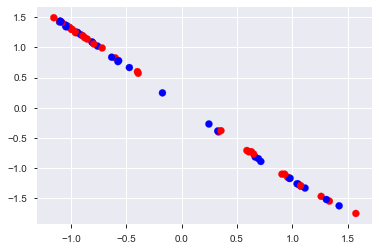

In [45]:
plt.scatter([x[0] for x in encoded_vals], [x[1] for x in encoded_vals], c = colors)

In [47]:
results = autoencoder.predict(np.array(X_test))
autoencoder.evaluate(np.array(X_test), results)

60/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0

In [49]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.262745,0.000000,0.0,0.470588,0.898039,0.0,0.007843,0.505882,0.003922,0.010196,0.0,0.007843,0.027451
1,0.239216,0.000000,0.0,0.580392,0.796078,0.0,0.000000,0.631373,0.000000,0.000000,0.0,0.003922,0.027451
2,0.192157,0.003922,0.0,0.525490,1.062745,0.0,0.000000,0.635294,0.000000,0.000000,0.0,0.000000,0.011765
3,0.250980,0.000000,0.0,0.666667,0.890196,0.0,0.007843,0.607843,0.000000,0.002353,0.0,0.000000,0.027451
4,0.172549,0.003922,0.0,0.462745,0.949020,0.0,0.000000,0.584314,0.000000,0.001176,0.0,0.003922,0.011765


In [51]:
y_test.head()

2      1
280    1
235    0
271    0
257    0
Name: goal, dtype: int64